In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from ultralytics import YOLO
import random
import cv2

In [2]:
random_data = []
data_path = Path("/home/namtt/WorkSpace/MyProjects/Vehicle/LicensePlate/data")
folder_test = "IMG_4521"
for img_id in os.listdir(data_path/f"temp/{folder_test}"):
    img_name = random.choice(os.listdir(data_path/f"temp/{folder_test}/{img_id}"))
    img_path = data_path/f"temp/{folder_test}/{img_id}/{img_name}"
    random_data.append(img_path)
model_license_detect = YOLO("../weights/best.pt")

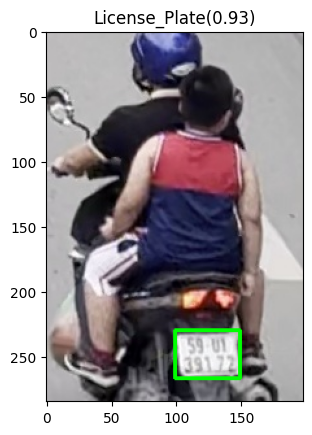

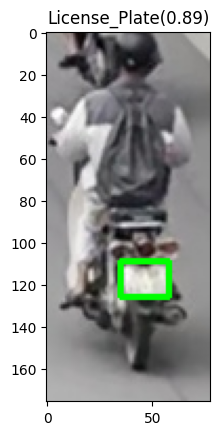

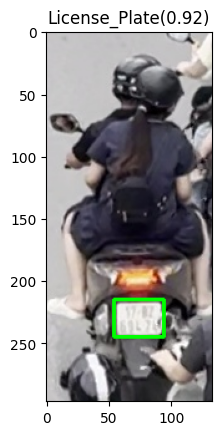

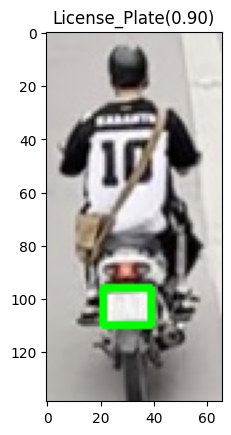

In [3]:
for img_path in random_data[:4]:
    img = cv2.imread(img_path)
    result = model_license_detect.predict(img, conf=0.8, verbose=False, iou=0.8, device="cpu")[0].boxes[0]
    x1, y1, x2, y2 = result.xyxy[0].cpu().numpy().astype(int)
    conf = result.conf[0].cpu().numpy()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.imshow(img)
    plt.title(f"License_Plate({conf:.2f})")
    plt.show()